<img src='https://www.met.no/om-oss/logo/_/image/73f29cde-219f-487b-809c-9cdd61032c78:2efc46ce776f5f5337c4b0156ae0cbaa3b6bf6fe/width-768/Met_RGB_Horisontal.jpg' width=200 align=right>
<img src='https://raw.githubusercontent.com/norkyst/norkyst-logo/refs/heads/main/png/horizontal_35_91_100.png' width=200 align=right>

# __UNDER CONSTRUCTION__

# Vertical cross-sections using Norkyust v3 data

This notebook will give tips and tricks on how to produce vertical cross-sections using data from the Norwegian ocean circulation model Norkyst v3.

__About cross-sections:__

...

__Python requirements__:

...

In [1]:
# Importing useful python libraries

import numpy as np
import matplotlib.pyplot as plt
import xarray as xr

import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

import cmocean
import xroms
import netCDF4
import roppy

In [2]:
# Reading in the path from thredds.met.no, using an OPENDAP url
path = 'https://thredds.met.no/thredds/dodsC/fou-hi/norkystv3_800m_m00_be'

# Opening a netCDF file as xarray dataset
ds0 = xr.open_dataset(path)

# Viewing the dataset
ds0

<xarray.Dataset>
Dimensions:                  (X: 2747, Y: 1148, depth: 15, time: 11255)
Coordinates:
  * X                        (X) int32 0 800 1600 ... 2195200 2196000 2196800
  * Y                        (Y) int32 0 800 1600 2400 ... 916000 916800 917600
  * depth                    (depth) float64 0.0 1.0 2.0 ... 100.0 200.0 300.0
  * time                     (time) datetime64[ns] 2024-01-01 ... 2025-04-19
    lon                      (Y, X) float64 ...
    lat                      (Y, X) float64 ...
Data variables:
    projection_stere         int32 ...
    forecast_reference_time  float64 ...
    h                        (Y, X) float64 ...
    zeta                     (time, Y, X) float32 ...
    u_eastward               (time, depth, Y, X) float32 ...
    v_northward              (time, depth, Y, X) float32 ...
    w                        (time, depth, Y, X) float32 ...
    temperature              (time, depth, Y, X) float32 ...
    salinity                 (time, depth, Y, X) float32 ...
    AKs                      (time, depth, Y, X) float32 ...
    Uwind_eastward           (time, Y, X) float32 ...
    Vwind_northward          (time, Y, X) float32 ...
Attributes: (12/37)
    id:                         8de46d42-5cb3-42ec-813a-0e8ee7439ec8
    naming_authority:           no.met
    operational_status:         Operational
    iso_topic_category:         oceans
    activity_type:              Numerical Simulation
    keywords_vocabulary:        GCMDSK:GCMD Science Keywords:https://gcmd.ear...
    ...                         ...
    dataset_production_status:  In Work
    license:                    https://spdx.org/licenses/CC-BY-4.0 (CC-BY-4.0)
    title:                      Norkyst-800m - ROMS, Norkyst-800m 120 hours o...
    summary:                    Norkyst-800m (Norwegian Coast 800m horizontal...
    title_no:                   120 timers prognoser fra havmodellen Norkyst-...
    summary_no:                 NorKyst-800m (Norske kystområder med 800m hor...

In [3]:
# choosing one time step to work with
ds = ds0.isel(time=5)

# Saving the timestep for later
time = ds0.time[5]

In [4]:
# The transect we will be working with
lat_sec = np.array([65.68, 65.63])
lon_sec = np.array([5.41, 11.69])

Text(0.5, 1.0, 'Sea surface height at 2024-01-01T05:00:00.000000000')

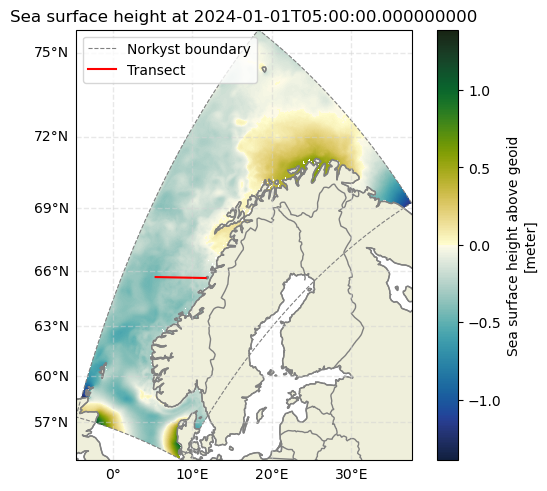

In [5]:
# Choosing a map projection
proj = ccrs.Mercator()

# Making figure and axes with the projection
fig, ax = plt.subplots(subplot_kw={'projection': proj}, constrained_layout=True)

# Setting the extent of the map to our model domain
ax.set_extent([np.min(ds.lon), np.max(ds.lon), np.min(ds.lat), np.max(ds.lat)], crs=ccrs.PlateCarree())  # ccrs.PlateCarree() to tell the program our data is in coordinates lats/lons

# Adding natural features to our map
land = cfeature.NaturalEarthFeature(category='physical', name='land', scale='50m', edgecolor='gray', facecolor=cfeature.COLORS['land'])
coastline = cfeature.NaturalEarthFeature(category='physical', name='coastline', scale='50m', edgecolor='gray', facecolor='none')
borders = cfeature.NaturalEarthFeature(category='cultural', name='admin_0_boundary_lines_land', edgecolor= 'gray', scale='50m', facecolor='none')

ax.add_feature(land)
ax.add_feature(coastline)
ax.add_feature(borders)

# Adding gridlines
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=1, color='lightgray', alpha=0.5, linestyle='--')
gl.top_labels = False  # Disable top labels
gl.right_labels = False  # Disable right labels
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER

# Plotting boundaries of model
ax.plot(ds.lon[0,:], ds.lat[0,:], '--', transform= ccrs.PlateCarree(), color = 'gray', linewidth =0.8)
ax.plot(ds.lon[-1,:], ds.lat[-1,:], '--', transform= ccrs.PlateCarree(), color = 'gray', linewidth =0.8)  
ax.plot(ds.lon[:,0], ds.lat[:,0], '--', transform= ccrs.PlateCarree(), color = 'gray', linewidth =0.8)
ax.plot(ds.lon[:,-1], ds.lat[:,-1], '--', transform= ccrs.PlateCarree(), color = 'gray', linewidth =0.8, label='Norkyst boundary')

# Plotting sea surface height
ds.zeta.plot(ax = ax, x = 'lon', y = 'lat', transform = ccrs.PlateCarree(), cmap=cmocean.cm.delta)

# Adding transect
ax.plot([lon_sec[0], lon_sec[1]], [lat_sec[0], lat_sec[1]], transform = ccrs.PlateCarree(), color = 'r', label = 'Transect')

# Adding legend
ax.legend(loc = 'upper left')

# Adding title
ax.set_title(f'Sea surface height at {time.values}')

In [ ]:
# Making a separate grid object using roppy and netCDF4
#grid = roppy.SGrid(netCDF4.Dataset(path))

In [16]:
# Convert lon/lat to x,y gridpoints
#x1, y1 = grid.ll2xy(lon_sec[0], lat_sec[0])
#x2, y2 = grid.ll2xy(lon_sec[1], lat_sec[1])